In [107]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import scipy.signal as signal



## This notebook details the results of the cavendish test performed. All data sampled at 20khz

# 20 Km/h towards radar V1

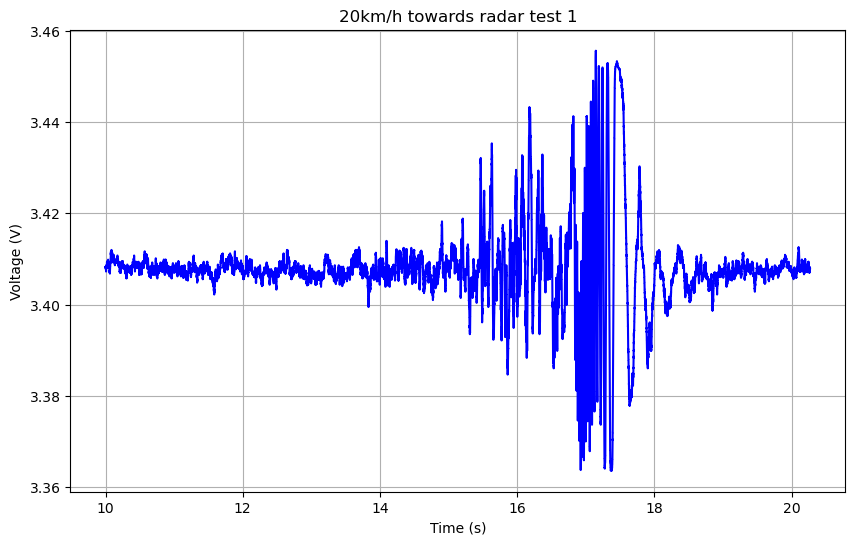

In [108]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('CarComingtowards20km20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

voltage_data = voltage_data[200000:]
time_data = time_data[200000:]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('20km/h towards radar test 1')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

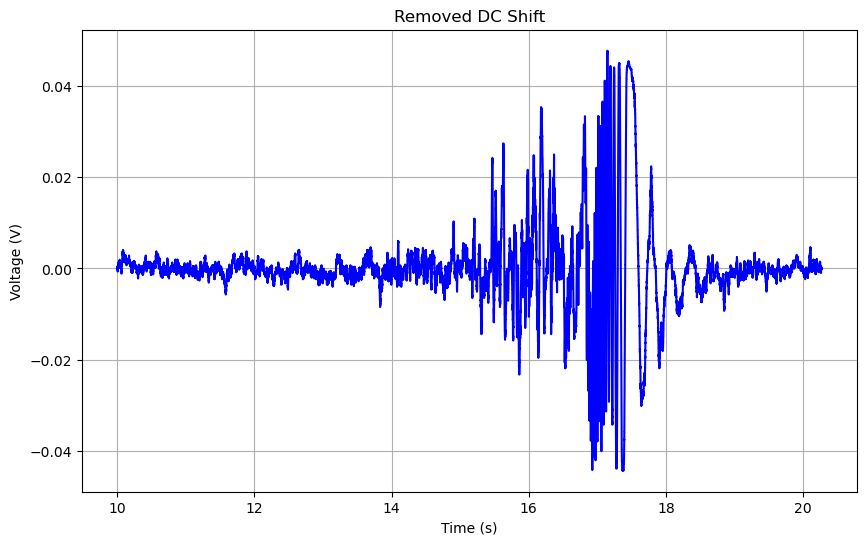

In [109]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Plotting DTFT

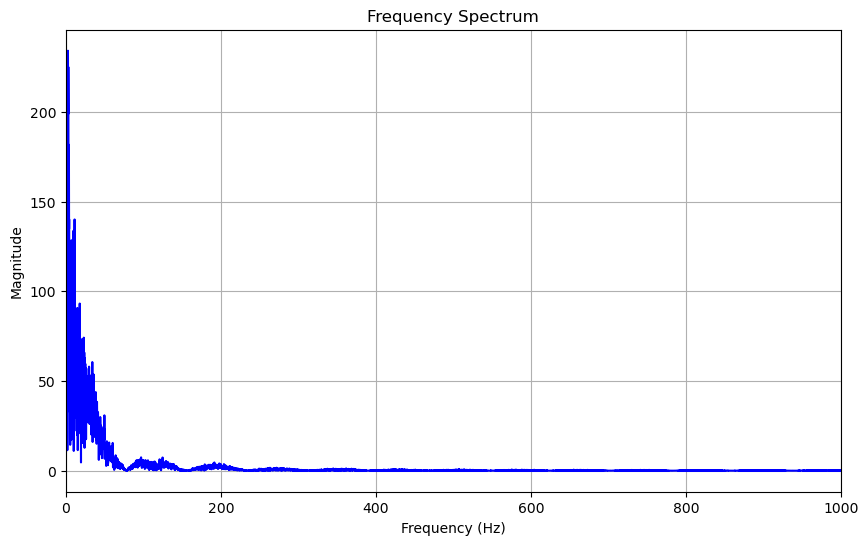

In [110]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

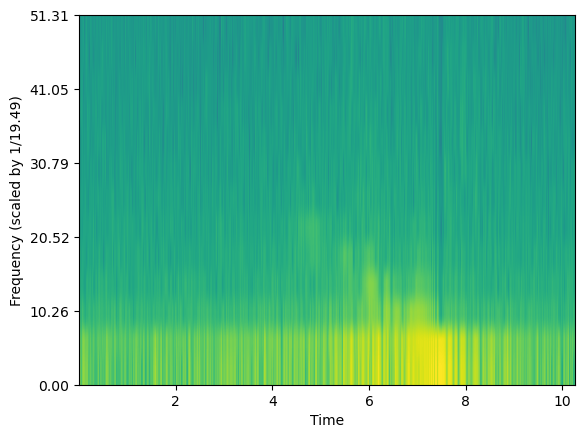

In [111]:
# Sample data
samplingFrequency = 20000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(voltage_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Frequency (scaled by 1/19.49)')

plt.show()


# Downsampling the data by average extra samples and then repeating the whole process. I'm downsamping from 20khz to 2khz here

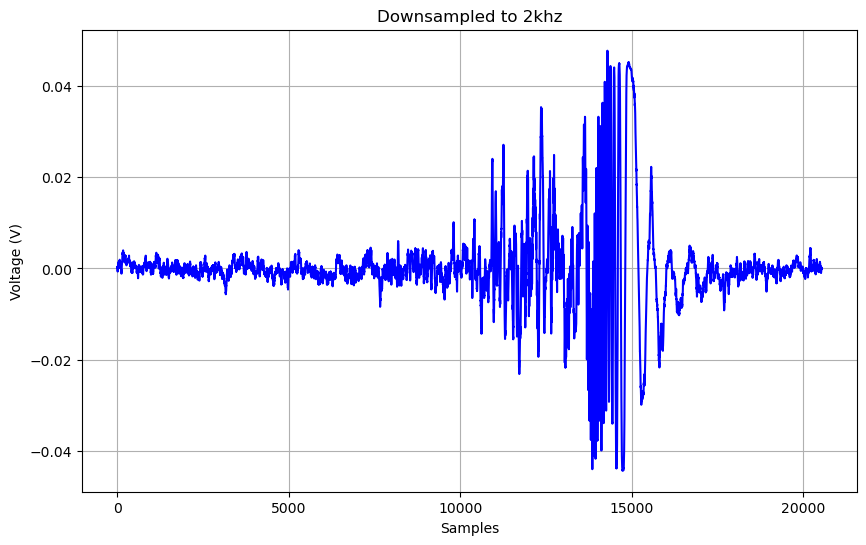

In [112]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Plotting DTFT

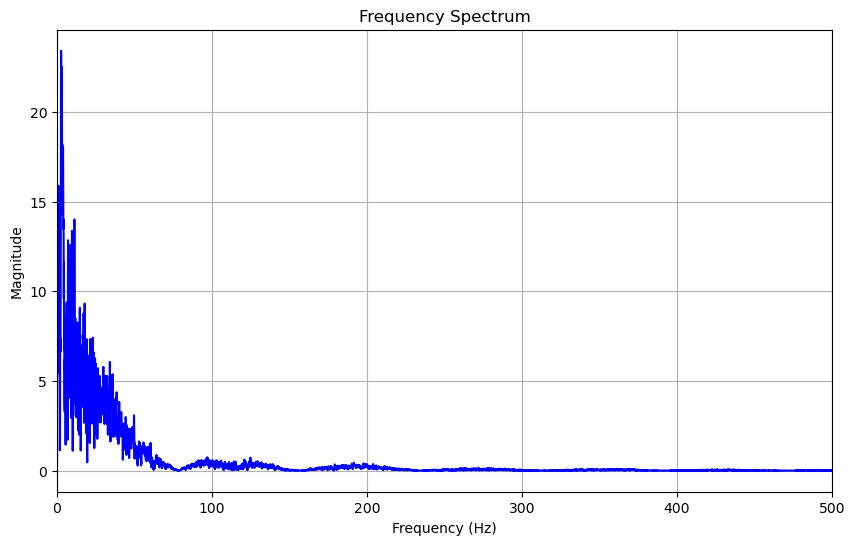

In [113]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 2000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

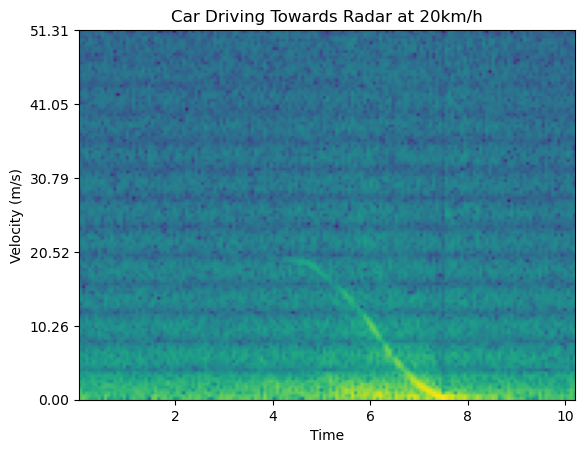

In [114]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Car Driving Towards Radar at 20km/h')

plt.show()


# Experimenting with using a highpass FIR filter to remove the low frequency noise

/var/folders/g1/gj5y689n0w5fnjjfvlmbhpgr0000gn/T/ipykernel_18402/2796149630.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(b, use_line_collection=True)


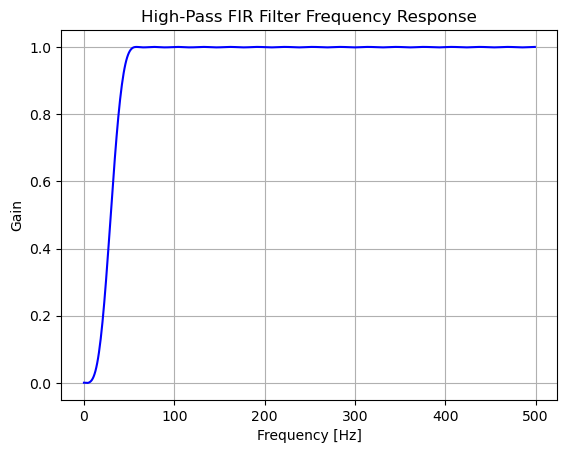

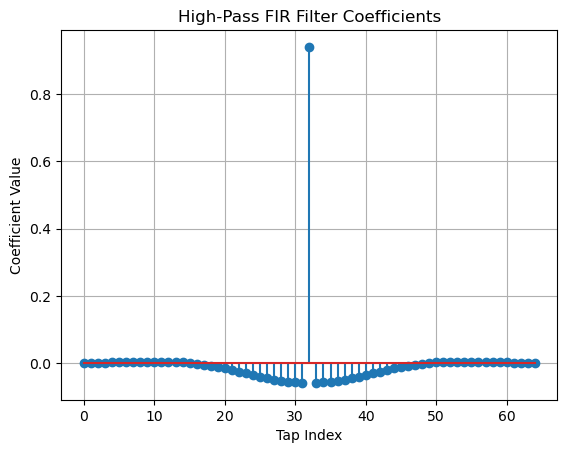

In [115]:
# Define filter parameters
cutoff_frequency = 5  # Cutoff frequency (normalized, 0.0 to 1.0)
filter_order = 64       # Filter order

# Design the high-pass FIR filter
nyquist_frequency = 1000  # Nyquist frequency is half of the sampling rate
cutoff = cutoff_frequency/nyquist_frequency 
taps = filter_order + 1

# Use the remez algorithm to design the filter
b = signal.remez(taps, [0, cutoff, cutoff + 0.05, 0.5], [0, 1], [1, 1])

# Frequency response of the filter
w, h = signal.freqz(b, 1)

# Plot the frequency response
plt.figure()
plt.title('High-Pass FIR Filter Frequency Response')
plt.plot(0.5 * nyquist_frequency * w / np.pi, np.abs(h), 'b')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()

# Display the filter coefficients
plt.figure()
plt.title('High-Pass FIR Filter Coefficients')
plt.stem(b, use_line_collection=True)
plt.xlabel('Tap Index')
plt.ylabel('Coefficient Value')
plt.grid()

plt.show()


# Applying the filter to my data

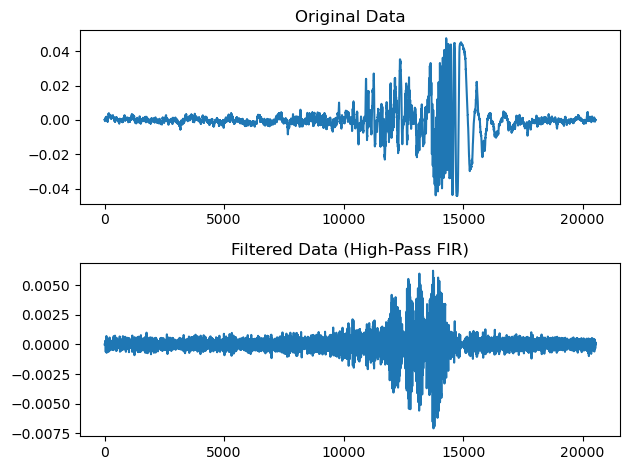

In [116]:
# Apply the filter to the data
filtered_data = signal.lfilter(b, 1, downsampled_data)

# Plot the original and filtered data
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(downsampled_data)
plt.title('Original Data')

plt.subplot(2, 1, 2)
plt.plot(filtered_data)
plt.title('Filtered Data (High-Pass FIR)')

plt.tight_layout()
plt.show()


# Plotting spectrogram of this

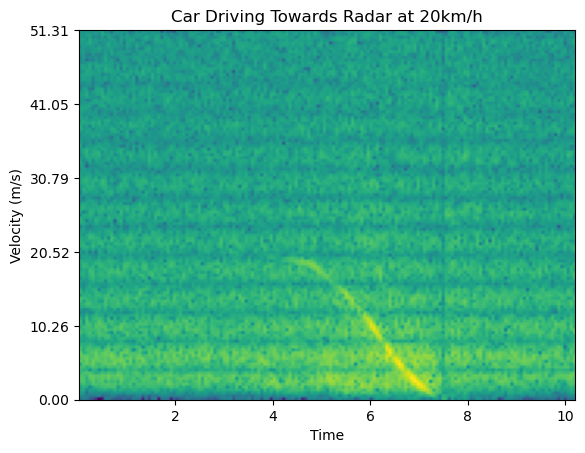

In [117]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(filtered_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Car Driving Towards Radar at 20km/h')

plt.show()


# 20km/h driving away V1

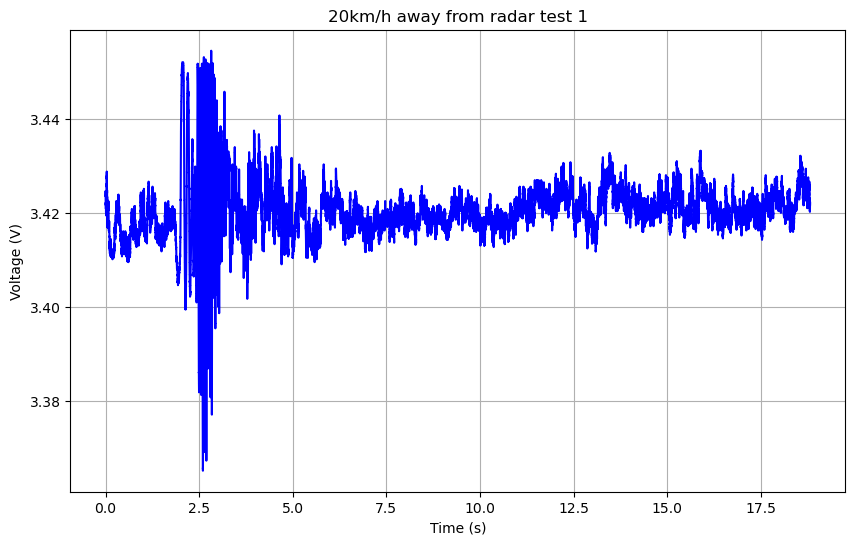

In [118]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('Cardrivingaway20km20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#voltage_data = voltage_data[200000:]
#time_data = time_data[200000:]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('20km/h away from radar test 1')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

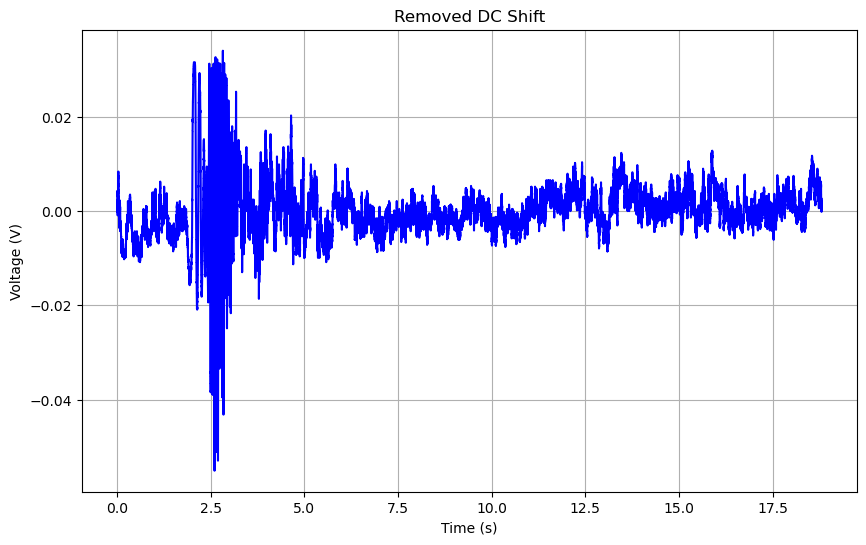

In [119]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Downsampling the data

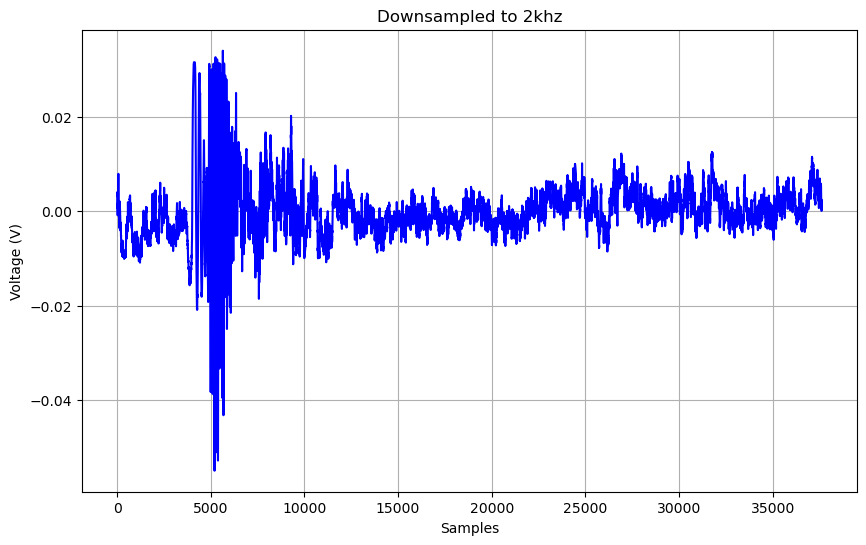

In [120]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Spectrogram

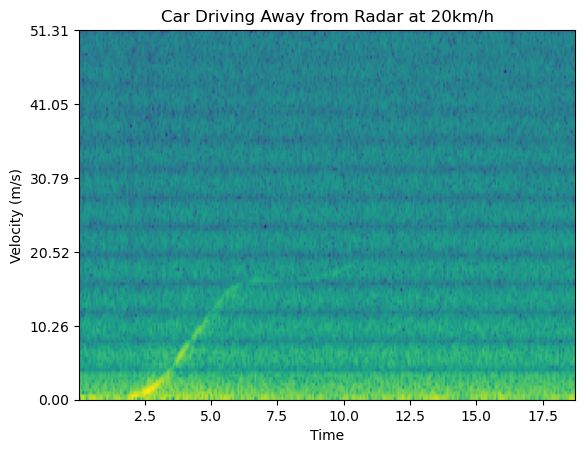

In [121]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Car Driving Away from Radar at 20km/h')

plt.show()


# Car Driving Towards Radar at 30km/h Test 1

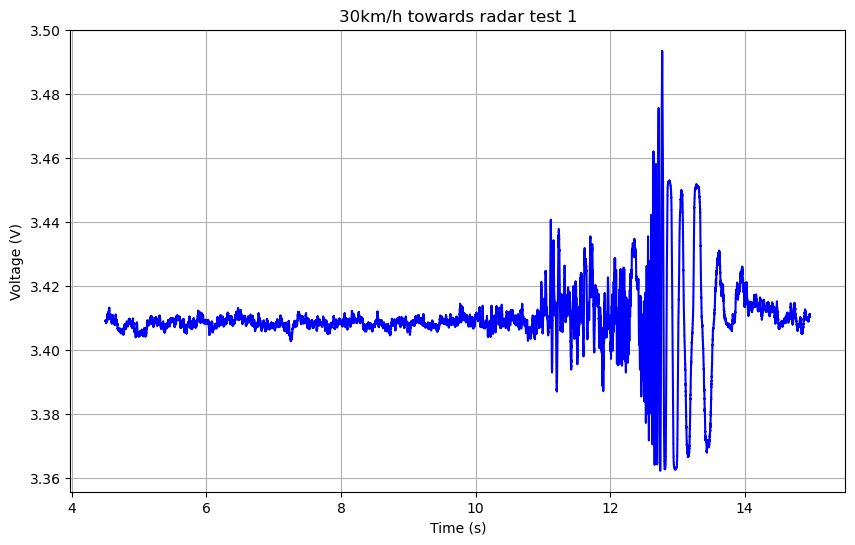

In [122]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('Carcomingtowards30km20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

voltage_data = voltage_data[90000:]
time_data = time_data[90000:]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('30km/h towards radar test 1')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

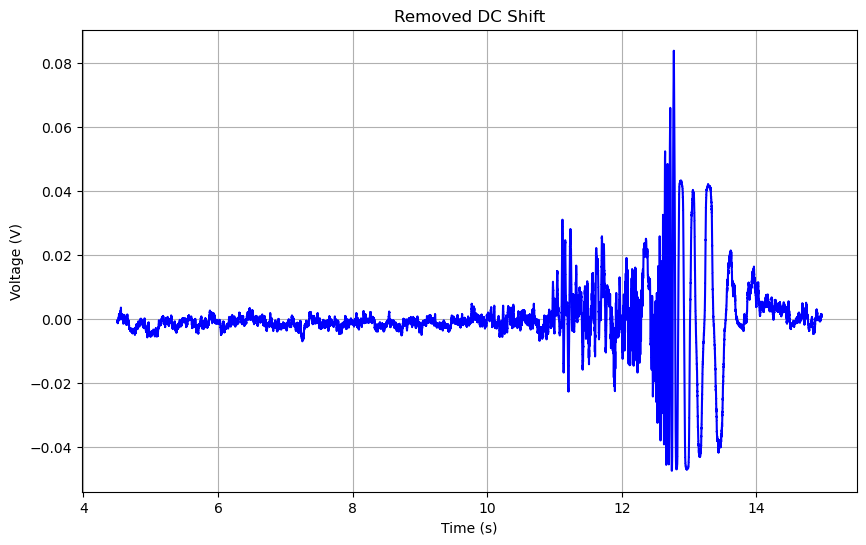

In [123]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Downsampling

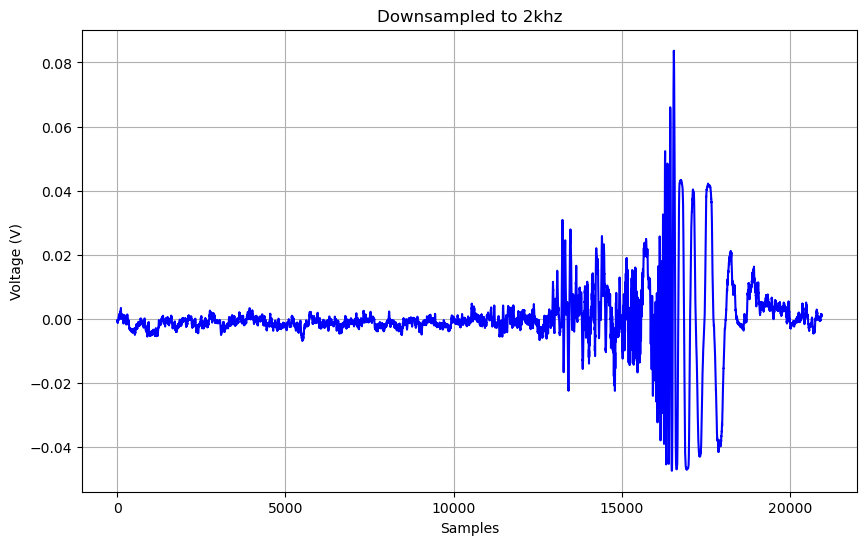

In [124]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Spectrogram

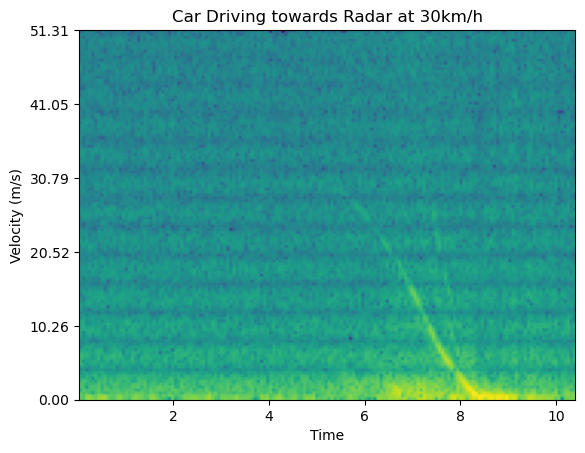

In [125]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 19.49

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Car Driving towards Radar at 30km/h')

plt.show()
